In [1]:
from main import *

## Two - Tetra  $\mu_r = 32$ 

CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/


/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Fmeasure.py:36: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: divide by zero encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)


[0.05567528 0.05567313 0.0556704  0.05563127 0.0550819  0.0502248
 0.04093903 0.04118644 0.05934761 0.13987903 0.91753731 1.41105283
 1.41286984]
[1.41311721 1.4131173  1.41311741 1.41311895 1.41314047 1.41332143
 1.41362088 1.41361369 1.41296775 1.40727888 1.0761623  0.09449821
 0.06163455]


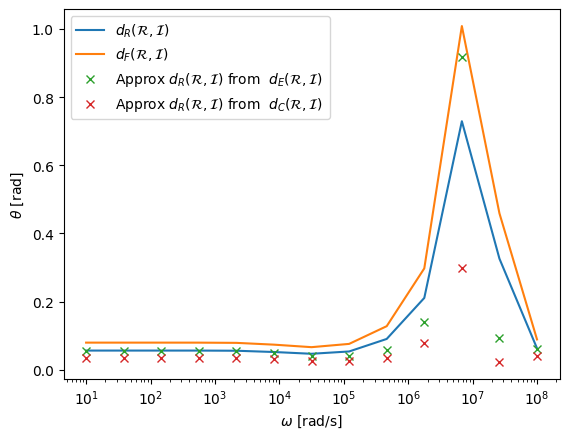

Computing F measure Tilde
[1.40566602 1.40566604 1.40566641 1.40567176 1.40574709 1.40643782
 1.40736042 1.40575967 1.4023076  1.40728593 1.12469262 0.22511087
 0.1451049 ]
[0.15525156 0.15525134 0.15524803 0.1551996  0.15451572 0.14809675
 0.13905629 0.15440127 0.18312128 0.13980817 0.85736019 1.39618233
 1.40674965]


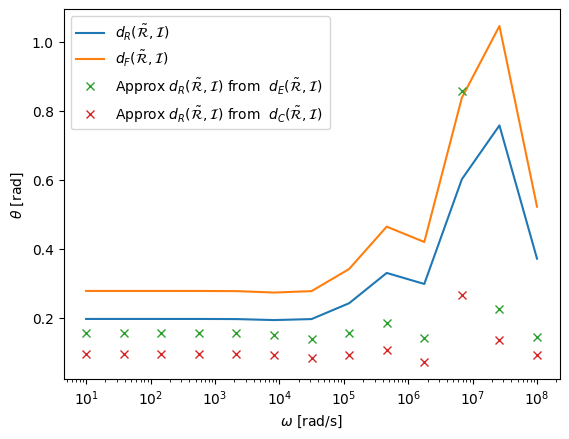

[1.40566602 1.40566607 1.40566675 1.40567675 1.40581821 1.40717887
 1.41009793 1.4120303  1.41351869 1.4129137  1.09482937 0.11688181
 0.01766165]
[0.15525155 0.15525113 0.15524495 0.15515438 0.15386739 0.14088157
 0.10781389 0.07855217 0.04432745 0.06062068 0.89518079 1.40937527
 1.41410327]


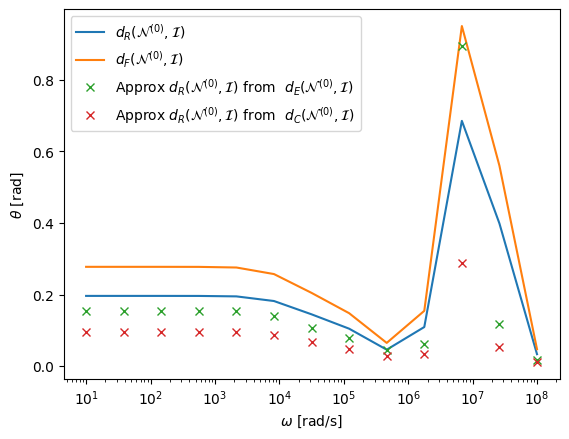

[0.21009817 0.21009576 0.21008694 0.20995847 0.20813912 0.19044004
 0.14827393 0.11895078 0.0998191  0.08488943 0.0768806  0.07586944
 0.07760735]
[1.3985202  1.39852057 1.39852189 1.39854118 1.39881311 1.40133243
 1.40641916 1.40920215 1.41068641 1.41166348 1.41212229 1.41217698
 1.41208254]


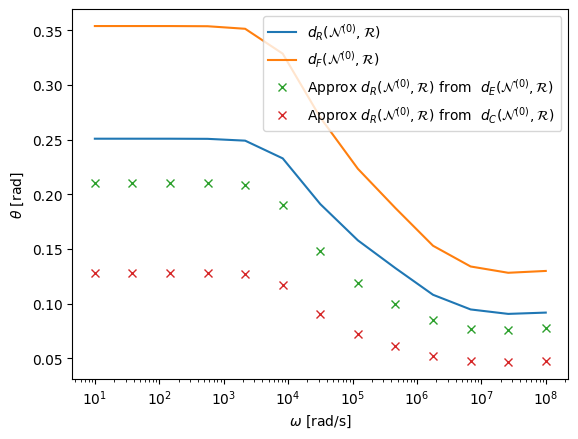

[1.41421356 1.41421356 1.41421356 1.41421356 1.41421341 1.41419504
 1.4138689  1.41219051 1.40742625 1.40376014 1.40500034 1.40672389
 1.40765626]
[1.43913291e-08 2.11232377e-07 3.10012113e-06 4.54293153e-05
 6.51292279e-04 7.23801645e-03 3.12208423e-02 7.56171795e-02
 1.38388437e-01 1.71631796e-01 1.61164614e-01 1.45354428e-01
 1.36028875e-01]


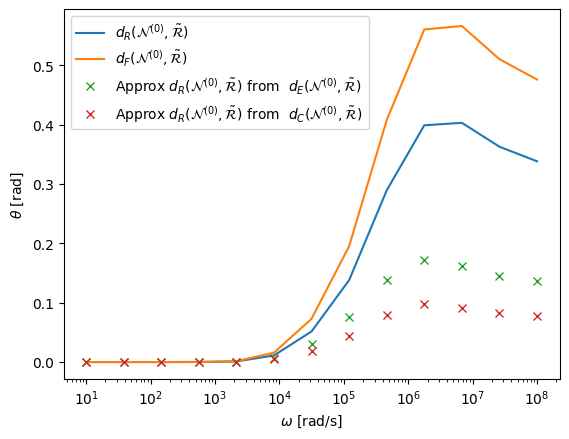

In [2]:
DirList=["CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/"]
SaveRIList=[]
SaveRtilde=[]

MaxOmega=1e8
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults, N0IResults, N0RResults, N0RtildeResults=main(directory,MaxOmega, Figures="On")

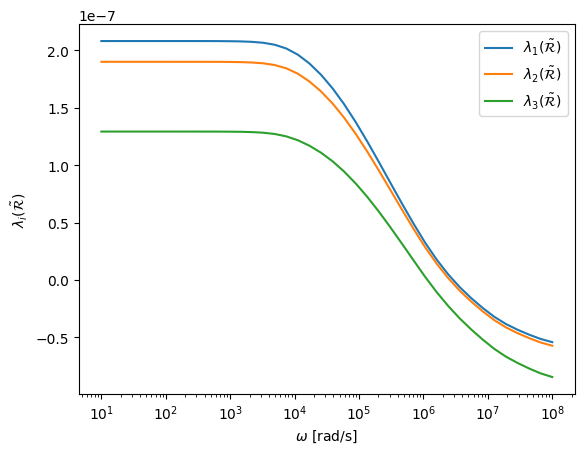

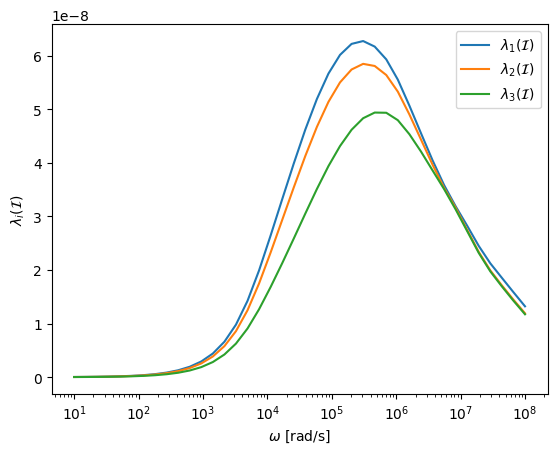

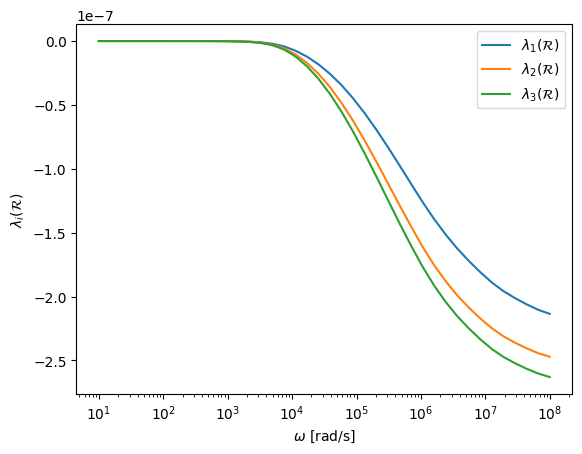

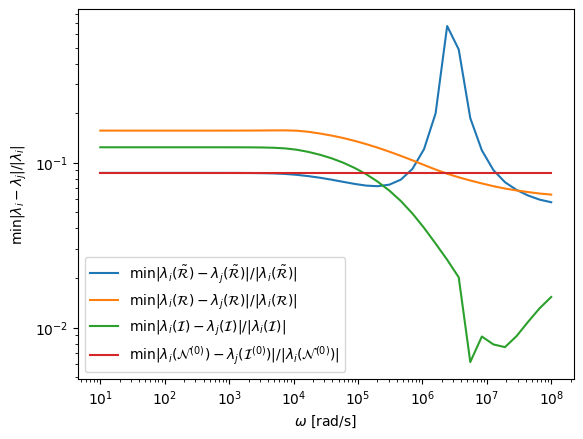

In [23]:
Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]


Labels=[r"$\lambda_1(\tilde{\cal R})$",r"$\lambda_2(\tilde{\cal R})$",r"$\lambda_3(\tilde{\cal R})$"]
plt.figure()
for n in range(3):
    plt.semilogx(Frequencies,URtildestore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i(\tilde{\cal R})$")
plt.savefig("CSG_TwoTetra_dRanddE__eig_Rtilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal I})$",r"$\lambda_2({\cal I})$",r"$\lambda_3({\cal I})$"]
for n in range(3):
    plt.semilogx(Frequencies,UIstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal I})$")
plt.savefig("CSG_TwoTetra_dRanddE__eig_I_al_0.001_mu_32_sig_1e7_ord3.pdf")

plt.show()

plt.figure()
Labels=[r"$\lambda_1({\cal R})$",r"$\lambda_2({\cal R})$",r"$\lambda_3({\cal R})$"]
for n in range(3):
    plt.semilogx(Frequencies,URstore[:,n],label=Labels[n])
plt.legend()
plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\lambda_i({\cal R})$")
plt.savefig("CSG_TwoTetra_dRanddE__eig_R_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()




relmindiffRtilde = np.zeros(len(Frequencies))
relmindiffI = np.zeros(len(Frequencies))
relmindiffR = np.zeros(len(Frequencies))
relmindiffN0 = np.zeros(len(Frequencies))


for n in range(len(Frequencies)):
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m]) < d:
                d=abs(URtildestore[n,m]-URtildestore[n,k])/abs(URtildestore[n,m])
    relmindiffRtilde[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) < d:
                d=abs(UIstore[n,m]-UIstore[n,k])/abs(UIstore[n,m]) 
    relmindiffI[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m]) < d:
                d=abs(URstore[n,m]-URstore[n,k])/abs(URstore[n,m]) 
    relmindiffR[n]=d
    d=1e6
    for m in range(3):
        for k in range(m+1,3):
            if abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) < d:
                d=abs(UN0store[n,m]-UN0store[n,k])/abs(UN0store[n,m]) 
    relmindiffN0[n]=d
     
plt.figure()
plt.loglog(Frequencies,relmindiffRtilde,label=r"$\min |\lambda_i(\tilde{\cal R})-\lambda_j(\tilde{\cal R})|/|\lambda_i(\tilde{\cal R})|$")
plt.loglog(Frequencies,relmindiffR,label=r"$\min |\lambda_i({\cal R})-\lambda_j({\cal R})|/|\lambda_i({\cal R})|$")
plt.loglog(Frequencies,relmindiffI,label=r"$\min |\lambda_i({\cal I})-\lambda_j({\cal I})|/|\lambda_i({\cal I})|$")
plt.loglog(Frequencies,relmindiffN0,label=r"$\min |\lambda_i({\cal N}^{(0)})-\lambda_j({\cal I}^{(0)})|/|\lambda_i({\cal N}^{(0)})|$")

plt.xlabel(r"$\omega$ [rad/s]")
plt.ylabel(r"$\min |\lambda_i-\lambda_j|/|\lambda_i|$")
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE__eig_prox_al_0.001_mu_32_sig_1e7_ord3.pdf")



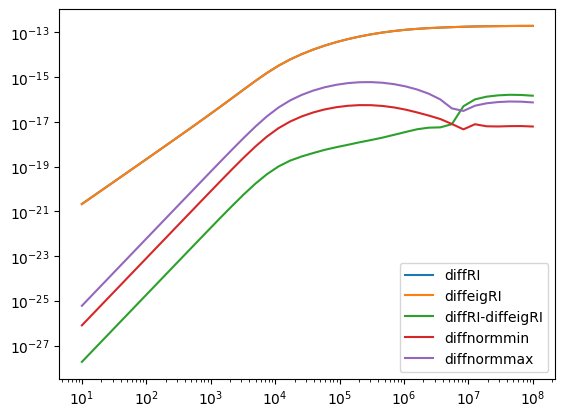

In [4]:
Perm = np.array([[1,2,3],[1,3,2],[2,1,3],[2,3,1],[3,1,2],[3,2,1]])

Frequencies=RIResults["Frequencies"]
URstore=RIResults["URstore"]
URtildestore=RIResults["URtildestore"]
UIstore=RIResults["UIstore"]
UN0store=RIResults["UN0store"]

Rstore=RIResults["Rstore"]
Rtildestore=RIResults["Rtildestore"]
Istore=RIResults["Istore"]
N0store=RIResults["N0store"]


N=len(Frequencies)
diffRI=np.zeros(N)
diffeigRI=np.zeros(N)
diffnormmin=np.zeros(N)
diffnormmax=np.zeros(N)
uR=np.zeros(3)
uI=np.zeros(3)
R=np.zeros((3,3))
I=np.zeros((3,3))
Rtilde=np.zeros((3,3))
N0=np.zeros((3,3))

sorteigenvalues="MaxDifference"
for n in range(N):
    for i in range(3):
        uR[i]=URstore[n,i]
        uI[i]=UIstore[n,i]

        for j in range(3):
            R[i,j]=Rstore[n,i,j]
            I[i,j]=Istore[n,i,j]
            Rtilde[i,j]=Rtildestore[n,i,j]
            N0[i,j]=N0store[n,i,j]
        
            
    if sorteigenvalues=="MinDifference":
            # Find min combination

        diffeig=1e10

    elif sorteigenvalues=="MaxDifference":
            # Find max combination
        diffeig=0.

    for m in range(6):
        mysum=0.
        ind=Perm[m,:]
        for i in range(3):
            mysum = mysum+ (uR[i]-uI[ind[i]-1])**2
        check = False
        if sorteigenvalues=="MinDifference" and mysum < diffeig:
            check = True
        elif sorteigenvalues=="MaxDifference" and mysum > diffeig:
            check = True
        if check==True:
            diffeig = mysum
            puI=np.zeros(3,dtype=np.longdouble)
        #         #S=np.zeros((3,3))
            for i in range(3):
                puI[i]=uI[ind[i]-1]
       
    

    evlist=np.zeros(3)    
    evlist[0]= - (puI[1]-puI[2])*(uR[1]-uR[2])
    evlist[1]= - (puI[0]-puI[2])*(uR[0]-uR[2])
    evlist[2]= - (puI[0]-puI[1])*(uR[0]-uR[1])
    normalisation_min = np.min(np.abs(evlist))
    normalisation_max = np.max(np.abs(evlist))

    Tol=1e-6
    diffRI[n]=np.linalg.norm(R-I,ord='fro')**2
    diffeigRI[n]=diffeig
    diffnormmin[n]=normalisation_min
    diffnormmax[n]=normalisation_max

plt.figure()
plt.loglog(Frequencies,diffRI,label='diffRI')
plt.loglog(Frequencies,diffeigRI,label='diffeigRI')
plt.loglog(Frequencies,np.abs(diffeigRI-diffRI),label='diffRI-diffeigRI')

plt.loglog(Frequencies,diffnormmin,label='diffnormmin')
plt.loglog(Frequencies,diffnormmax,label='diffnormmax')
plt.legend()


In [ ]:
Frequencies=RIResults["Frequencies"]
Rstore=RIResults["Rstore"]
Rtildestore=RIResults["Rtildestore"]
Istore=RIResults["Istore"]
N0store=RIResults["N0store"]



dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min', 'URstore', 'UIstore', 'URtildestore', 'UN0store', 'QRstore', 'QIstore', 'QRtildestore', 'QN0store', 'AnglestoreRIfmeasfullconstsortedmindiff', 'AnglestoreRIfmeasfullconstsortedmaxdiff', 'AnglestoreRIcommeasfullconstsortedmindiff', 'AnglestoreRIcommeasfullconstsortedmaxdiff'])


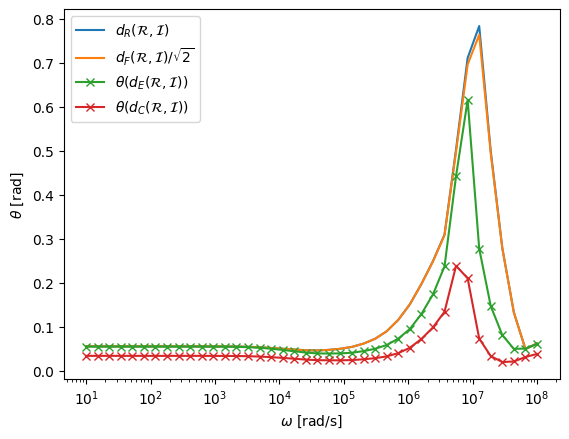

In [14]:
print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

dict_keys(['Frequencies', 'MinAnglestoreRI', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRIfmeasapprxconstsortedmindiff_min', 'AnglestoreRIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRIfmeasapprxconstsortedmindiff_max', 'dFMinAnglestoreRI', 'dFMaxAnglestoreRI', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRIcommeasapprxconstsortedmindiff_min', 'AnglestoreRIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRIcommeasapprxconstsortedmindiff_max', 'RIfmeasapprx_den_const_max', 'RIfmeasapprx_den_const_min', 'RIcommeapprx_den_const_max', 'RIcommeapprx_den_const_min', 'URstore', 'UIstore', 'URtildestore', 'UN0store', 'QRstore', 'QIstore', 'QRtildestore', 'QN0store', 'AnglestoreRIfmeasfullconstsortedmindiff', 'AnglestoreRIfmeasfullconstsortedmaxdiff', 'AnglestoreRIcommeasfullconstsortedmindiff', 'AnglestoreRIcommeasfullconstsortedmaxdiff'])


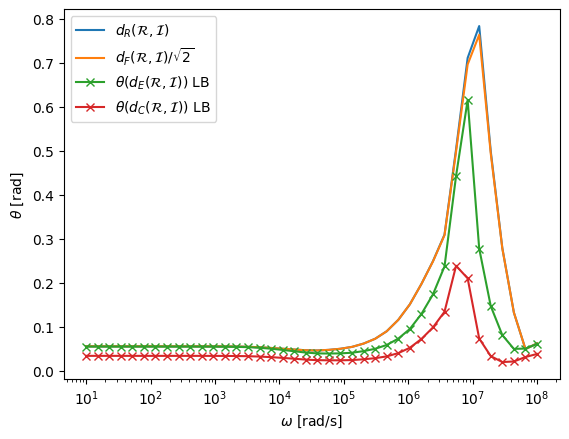

In [15]:

print(RIResults.keys())

Frequencies=RIResults["Frequencies"]
MinAnglestoreRI=RIResults["MinAnglestoreRI"]
AnglestoreRIfmeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
AnglestoreRIcommeasapprxconstsortedmin=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])

#AnglestoreRIfmeasupper=np.fmax(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIfmeaslower=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_min"])

##AnglestoreRIfmeasupper=np.fmax(AnglestoreRIfmeasupper,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRIfmeaslower=np.fmin(AnglestoreRIfmeaslower,RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
#AnglestoreRIfmeasavg=(AnglestoreRIfmeasupper+AnglestoreRIfmeaslower)/2

#AnglestoreRIcommmupper=np.fmax(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmlower=np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2

#AnglestoreRIcommmupper=np.fmax(AnglestoreRIcommmupper,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmlower=np.fmin(AnglestoreRIcommmlower,RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
#AnglestoreRIcommmavg = (AnglestoreRIcommmupper+AnglestoreRIcommmlower )/2



dFMinAnglestoreRI = RIResults["dFMinAnglestoreRI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRI,label=r'$d_R({\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRI/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRIfmeasapprxconstsortedmin,'-x',label=r'$\theta(d_E({\cal R},{\cal I}))$ LB')

plt.semilogx(Frequencies,AnglestoreRIcommeasapprxconstsortedmin,'-x',label=r'$\theta(d_C({\cal R},{\cal I}))$ LB')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.2)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()


dict_keys(['Frequencies', 'MinAnglestoreRtildeI', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIfmeasapprxconstsortedmindiff_max', 'AnglestoreRtildeIfmeasfullconstsortedmindiff', 'AnglestoreRtildeIfmeasfullconstsortedmaxdiff', 'dFMinAnglestoreRtildeI', 'dFMaxAnglestoreRtildeI', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max', 'AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_min', 'AnglestoreRtildeIcommeasapprxconstsortedmindiff_max', 'RtildeIfmeasapprx_den_const_max', 'RtildeIfmeasapprx_den_const_min', 'RtildeIcommeapprx_den_const_max', 'RtildeIcommeapprx_den_const_min'])


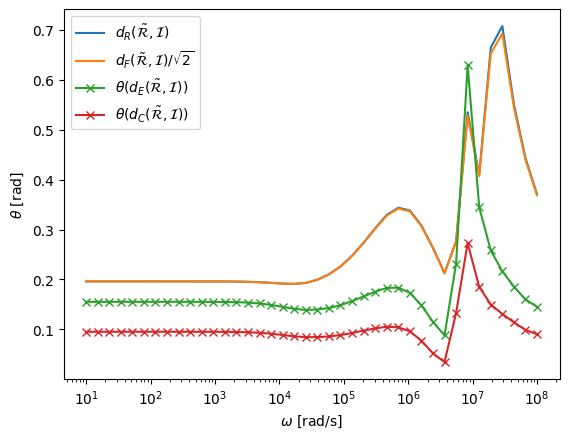

In [18]:
print(RtildeIResults.keys())

Frequencies=RtildeIResults["Frequencies"]
MinAnglestoreRtildeI=RtildeIResults["MinAnglestoreRtildeI"]
AnglestoreRtildeIfmeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
AnglestoreRtildeIcommeasapprxconstsortedmin=np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_min"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreRtildeI = RtildeIResults["dFMinAnglestoreRtildeI"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreRtildeI,label=r'$d_R(\tilde{\cal R},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreRtildeI/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreRtildeIfmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ ')
plt.semilogx(Frequencies,AnglestoreRtildeIcommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ ')

plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_tilde_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

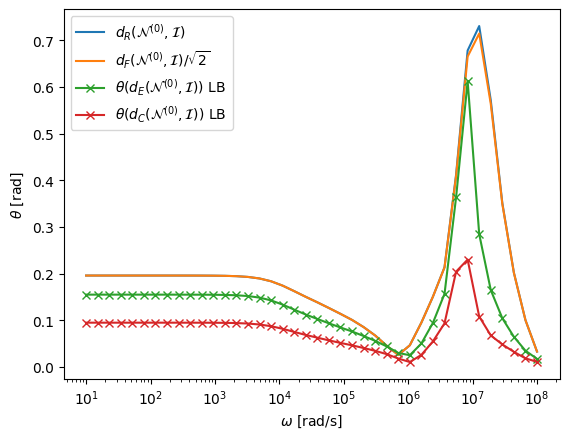

In [19]:

Frequencies=N0IResults["Frequencies"]
MinAnglestoreN0I=N0IResults["MinAnglestoreN0I"]
AnglestoreN0Ifmeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
AnglestoreN0Icommeasapprxconstsortedmin=np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_min"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])

dFMinAnglestoreN0I = N0IResults["dFMinAnglestoreN0I"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0I,label=r'$d_R({\cal N}^{(0)},{\cal I})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0I/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Ifmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB')
plt.semilogx(Frequencies,AnglestoreN0Icommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_N0I_al_0.001_mu_32_sig_1e7_ord3.pdf")
plt.show()

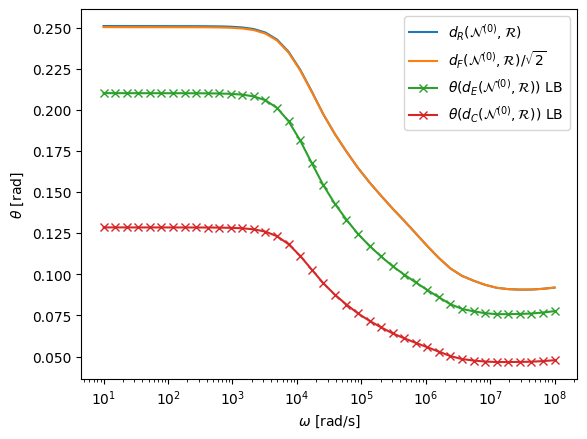

In [20]:
Frequencies=N0RResults["Frequencies"]
MinAnglestoreN0R=N0RResults["MinAnglestoreN0R"]
AnglestoreN0Rfmeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_min"])
AnglestoreN0Rfmeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rfmeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rfmeasapprxconstsortedmindiff_max"])

AnglestoreN0Rcommeasapprxconstsortedmin=np.fmin(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_min"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_min"])
AnglestoreN0Rcommeasapprxconstsortedmax=np.fmax(N0RResults["AnglestoreN0Rcommeasapprxconstsortedmaxdiff_max"],N0RResults["AnglestoreN0Rcommeasapprxconstsortedmindiff_max"])


dFMinAnglestoreN0R = N0RResults["dFMinAnglestoreN0R"]
fig=plt.figure()
plt.semilogx(Frequencies,MinAnglestoreN0R,label=r'$d_R({\cal N}^{(0)},{\cal R})$')
plt.semilogx(Frequencies,dFMinAnglestoreN0R/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal R})/\sqrt{2}$')
plt.semilogx(Frequencies,AnglestoreN0Rfmeasapprxconstsortedmin,'x-',label=r'$\theta(d_E({\cal N}^{(0)},{\cal R}))$ LB')

plt.semilogx(Frequencies,AnglestoreN0Rcommeasapprxconstsortedmin,'x-',label=r'$\theta(d_C({\cal N}^{(0)},{\cal R}))$ LB ')


plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
#plt.ylim(0,0.5)
plt.legend()
plt.savefig("CSG_TwoTetra_dRanddE_metrics_N0R_al_0.001_mu_32_sig_1e7_ord3.pdf")


plt.show()

In [11]:
## Loop over different Permeabilities and compare results

DirList=["CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_8_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_32_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_64_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/",
         "CSG_TwoTetra/al_0.001_mu_128_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/"]

murlist=[1,2,8,16,32,64,128]
Nresults=len(Frequencies)
Results=np.zeros((7,Nresults))
TildeResults=np.zeros((7,Nresults))
N0Results=np.zeros((7,Nresults))


dRresults=np.zeros((7,Nresults))
dRTilderesults=np.zeros((7,Nresults))
dRN0results=np.zeros((7,Nresults))

dFresults=np.zeros((7,Nresults))
dFTilderesults=np.zeros((7,Nresults))
dFN0results=np.zeros((7,Nresults))

dCresults=np.zeros((7,Nresults))
dCTilderesults=np.zeros((7,Nresults))
dCN0results=np.zeros((7,Nresults))


In [12]:
MaxOmega=1e8
count=0
for directory in DirList:
    print(directory)
    RIResults,RtildeIResults,N0IResults=main(directory,MaxOmega,Figures="Off")
    
    AnglestoreRIfmeasapprxconstsortedmaxdiff_max=np.fmin(RIResults["AnglestoreRIfmeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIfmeasapprxconstsortedmindiff_min"])
    Results[count,:] =AnglestoreRIfmeasapprxconstsortedmaxdiff_max
    
    AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max=np.fmin(RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIfmeasapprxconstsortedmindiff_min"])
    TildeResults[count,:] =AnglestoreRtildeIfmeasapprxconstsortedmaxdiff_max
    
    AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max=np.fmin(N0IResults["AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Ifmeasapprxconstsortedmindiff_min"])
    N0Results[count,:] =AnglestoreN0Ifmeasapprxconstsortedmaxdiff_max
    
    
    dRresults[count,:] = RIResults["MinAnglestoreRI"]
    dFresults[count,:] = RIResults["dFMinAnglestoreRI"]
    dCresults[count,:] = np.fmin(RIResults["AnglestoreRIcommeasapprxconstsortedmaxdiff_max"],RIResults["AnglestoreRIcommeasapprxconstsortedmindiff_min"])
    
    dRTilderesults[count,:] = RtildeIResults["MinAnglestoreRtildeI"]
    dFTilderesults[count,:] = RtildeIResults["dFMinAnglestoreRtildeI"]
    dCTilderesults[count,:] = np.fmin(RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmaxdiff_max"],RtildeIResults["AnglestoreRtildeIcommeasapprxconstsortedmindiff_min"])

    dRN0results[count,:] = N0IResults["MinAnglestoreN0I"]
    dFN0results[count,:] = N0IResults["dFMinAnglestoreN0I"]
    dCN0results[count,:] = np.fmin(N0IResults["AnglestoreN0Icommeasapprxconstsortedmaxdiff_max"],N0IResults["AnglestoreN0Icommeasapprxconstsortedmindiff_min"])
    
        
    count+=1
Frequencies=RtildeIResults["Frequencies"]


CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_1_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
6
R [-2.34392903e-14 -1.11520443e-14 -1.01875052e-14] [[-0.2263778   0.91156142  0.34323295]
 [ 0.27331088 -0.27877831  0.92064315]
 [-0.93490869 -0.30222247  0.18603043]] 1
Rtilde [-2.34392322e-14 -1.11519862e-14 -1.01874471e-14] [[-0.2263778   0.91156142  0.34323295]
 [ 0.27331088 -0.27877831  0.92064315]
 [-0.93490869 -0.30222247  0.18603043]] 1
I [3.84161605e-11 2.23215688e-11 2.08243021e-11] [[ 0.23052942 -0.91481352  0.33162087]
 [-0.27754854  0.2648251   0.92349038]
 [ 0.93264302  0.30493259  0.19285518]] 1
7
R [-5.35699031e-14 -2.54870505e-14 -2.32828014e-14] [[-0.22639253  0.91161565  0.34307919]
 [ 0.27332916 -0.27861414  0.92068742]
 [-0.93489978 -0.3022103   0.18609498]] 1
Rtilde [-5.35698449e-14 -2.54869924e-14 -2.32827432e-14] [[-0.22639253  0.91161565  0.34307919]
 [ 0.27332916 -0.278

/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Fmeasure.py:31: RuntimeWarning: divide by zero encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Fmeasure.py:31: RuntimeWarning: invalid value encountered in scalar divide
  Fexactconst[n] = np.abs(np.linalg.norm(R-I,ord='fro')**2 - diffeig) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Commeasure.py:37: RuntimeWarning: invalid value encountered in scalar divide
  Comexactconst[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Commeasure.py:67: RuntimeWarning: invalid value encountered in scalar divide
  Comapproxconst_min[n] = np.abs(np.linalg.norm(Z,ord='fro')**2 ) / np.abs(normalisation_min)
/Users/paulledger/Coding/Rodrigues_angles/Rodrigues_Angles/src/Commeasure.py

-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
-0.0
CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_2_sig_1e7/1e1-1e8_40_el_24874_ord_3_POD_13_1e-7/Data/
6
R [-6.47233688e-14 -4.1

CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
Opening files from this path =  CSG_TwoTetra/al_0.001_mu_16_sig_1e7/1e1-1e8_40_el_25014_ord_3_POD_13_1e-7/Data/
6
R [-6.96866205e-13 -8.67339634e-13 -9.88421911e-13] [[ 0.41626459 -0.89861318 -0.13862954]
 [-0.46470442 -0.34131048  0.81704159]
 [ 0.78152005  0.27568372  0.55966498]] 1
Rtilde [1.13507057e-07 1.61119593e-07 1.74225427e-07] [[-0.29242341  0.95533407  0.0427242 ]
 [ 0.35009774  0.06537403  0.93442914]
 [-0.88989894 -0.2882066   0.35357719]] 1
I [2.01584668e-10 2.54393693e-10 2.84136621e-10] [[-0.37711335  0.919386   -0.11187001]
 [ 0.43864318  0.28367967  0.85271215]
 [-0.81570686 -0.27249811  0.51026178]] 1
7
R [-1.59263055e-12 -1.98221492e-12 -2.25892102e-12] [[ 0.4162651  -0.89861399 -0.13862274]
 [-0.46469376 -0.34130087  0.81705167]
 [ 0.78152612  0.27569297  0.55965195]] 1
Rtilde [1.13506147e-07 1.61118474e-07 1.74224174e-07] [[-0.29242271  0.9553342   0.04272622]
 [ 0.35009693  0.0653715

6 1.0
[-2.77667383e-12 -3.82225891e-12 -4.45256386e-12] [3.75699672e-10 2.62252213e-10 4.34976663e-10]
[[ 0.36638417 -0.92446483 -0.10548661]
 [-0.42895183 -0.26842131  0.86252555]
 [ 0.82568939  0.27076703  0.4948962 ]] [[ 0.93649419  0.33951228 -0.08780683]
 [ 0.23190974 -0.41176431  0.88128771]
 [-0.26305228  0.84568408  0.46435109]]
0.04770855088697818 1.545152123128955
0.06747007970553151 1.9741920949633942
7 1.0
[-8.73246086e-12 -6.34340849e-12 -1.01725277e-11] [3.96375973e-10 5.67856098e-10 6.57451009e-10]
[[-0.92447139  0.36636895 -0.10548195]
 [-0.26840641 -0.42894561  0.86253328]
 [ 0.27075939  0.82569938  0.49488371]] [[ 0.33950342  0.93649791 -0.08780149]
 [-0.41175888  0.23189844  0.88129322]
 [ 0.84569028 -0.26304902  0.46434164]]
0.04770244811439439 1.5451585382898956
0.06746144908177544 1.974198591840433
6 1.0
[2.08610346e-07 1.39067125e-07 2.30250125e-07] [2.62252213e-10 3.75699672e-10 4.34976663e-10]
[[ 0.95770076 -0.28667014  0.02508973]
 [ 0.07986862  0.34855737  0.

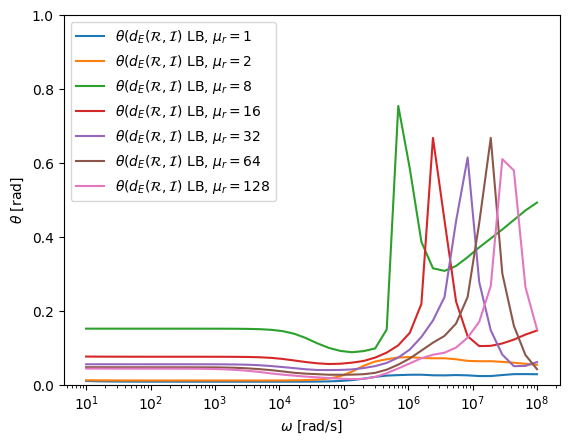

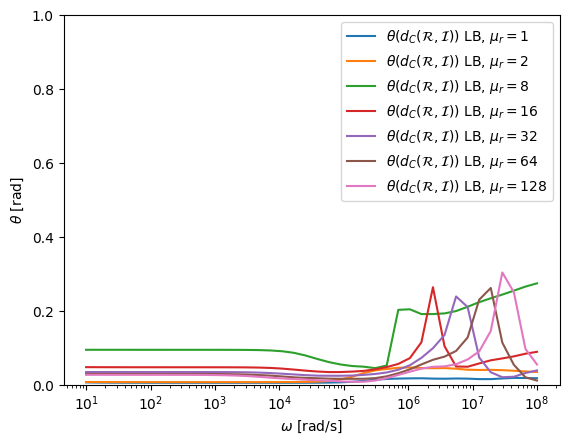

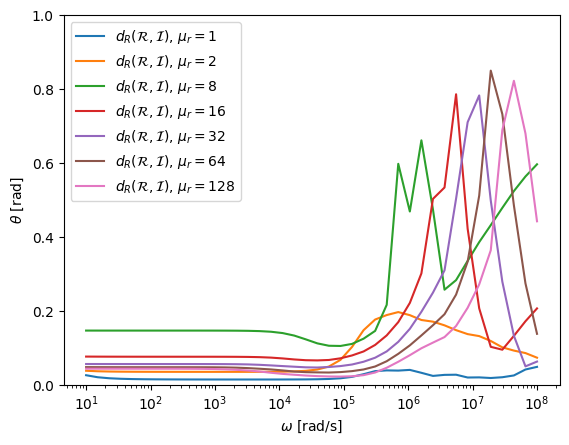

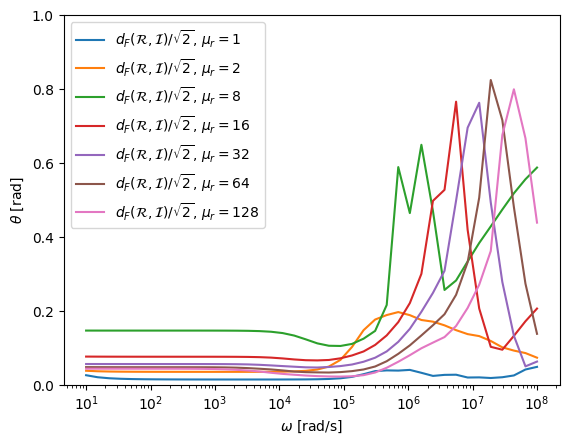

In [19]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,Results[count,:],label=r'$\theta(d_E({\cal R},{\cal I})$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCresults[count,:],label=r'$\theta(d_C({\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRresults[count,:],label=r'$d_R({\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFresults[count,:]/np.sqrt(2),label=r'$d_F({\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()



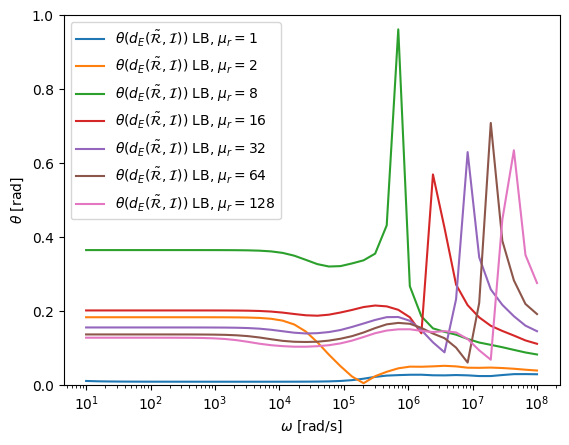

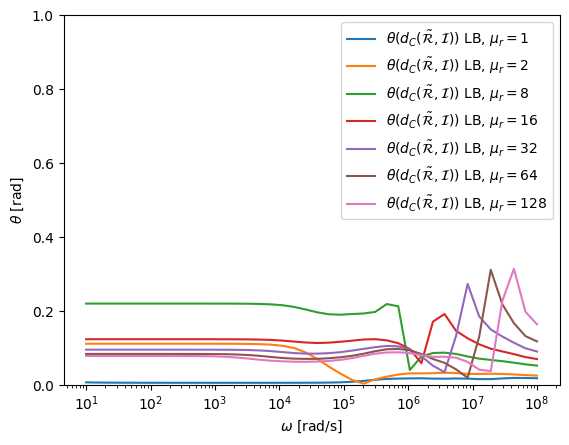

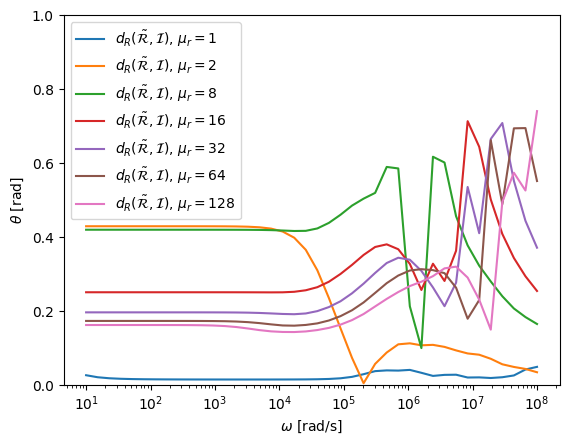

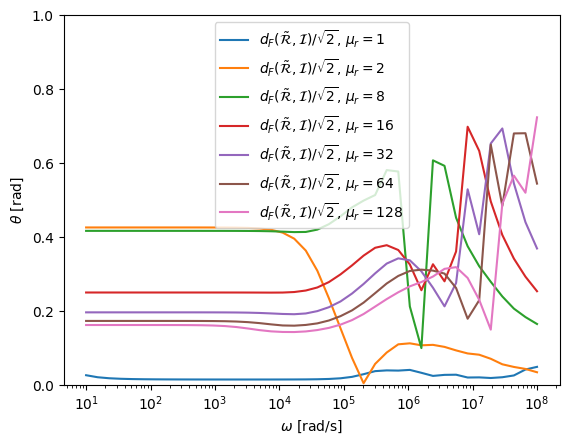

In [18]:
fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,TildeResults[count,:],label=r'$\theta(d_E(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dCTilderesults[count,:],label=r'$\theta(d_C(\tilde{\cal R},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dRTilderesults[count,:],label=r'$d_R(\tilde{\cal R},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(7):
    plt.semilogx(Frequencies,dFTilderesults[count,:]/np.sqrt(2),label=r'$d_F(\tilde{\cal R},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_tilde_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

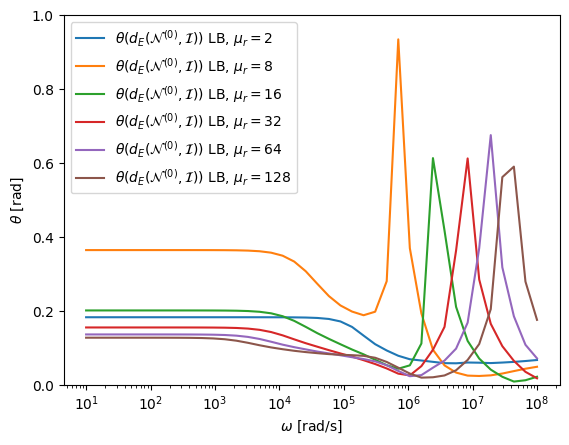

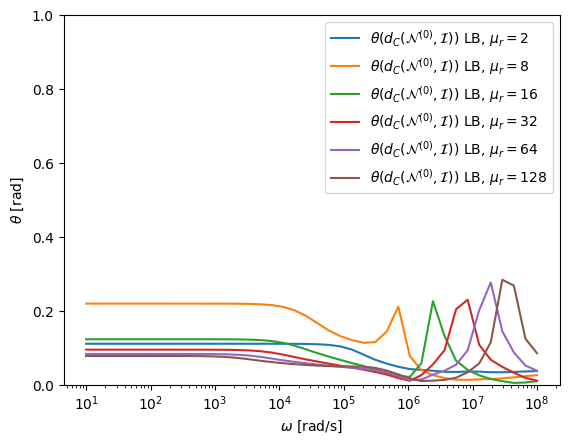

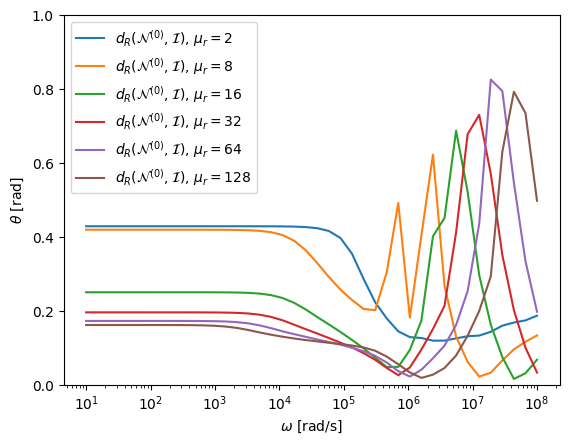

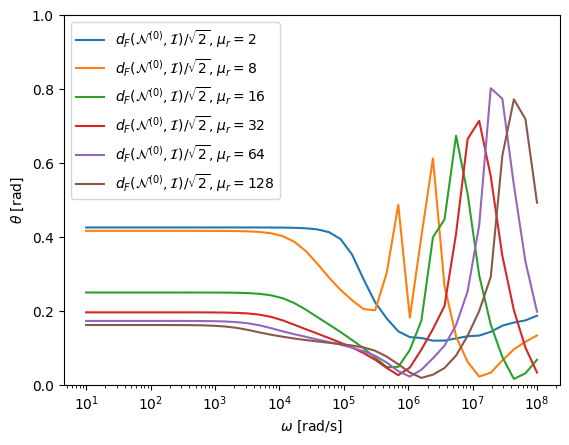

In [17]:
fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,N0Results[count,:],label=r'$\theta(d_E({\cal N}^{(0)},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dCN0results[count,:],label=r'$\theta(d_C({\cal N}^{(0)},{\cal I}))$ LB, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_apprxdR_metricsdC_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()


fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dRN0results[count,:],label=r'$d_R({\cal N}^{(0)},{\cal I})$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dR_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()

fig=plt.figure()
for count in range(1,7):
    plt.semilogx(Frequencies,dFN0results[count,:]/np.sqrt(2),label=r'$d_F({\cal N}^{(0)},{\cal I})/\sqrt{2}$, $\mu_r=$'+str(murlist[count]))
plt.xlabel(r'$\omega$ [rad/s]')
plt.ylabel(r'$\theta$ [rad]')
plt.legend()
plt.ylim(0,1.0)
plt.savefig("CSG_TwoTetra_dF_metrics_N0_al_0.001_varymu_sig_1e7_ord3.pdf")
plt.show()